In [12]:
import os

import tqdm
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [13]:
DATA_ROOT = "../../raw/frog"
FROG_H5 = os.path.join(DATA_ROOT, "frog_11-36_12-43_train_val.h5")

In [14]:
hf = h5py.File(FROG_H5, "r")

In [15]:
list(hf.values())

[<HDF5 dataset "circle_idx": shape (120396,), type "<u4">,
 <HDF5 dataset "circle_num": shape (120396,), type "<u4">,
 <HDF5 dataset "circles": shape (473005, 6), type "<f4">,
 <HDF5 dataset "scans": shape (120396, 720), type "<f4">,
 <HDF5 dataset "split": shape (120396,), type "|u1">,
 <HDF5 dataset "timestamps": shape (120396,), type "<f8">]

In [42]:
scans = hf["scans"]
circle_idx = hf["circle_idx"]
circle_num = hf["circle_num"]
circles = hf["circles"]

[[ 6.524585    4.5060797   0.4         7.9293733   0.6044103   0.05040263]
 [ 5.709624   -0.78813535  0.4         5.763763   -0.13716947  0.06928802]
 [ 4.1069365  -0.9943618   0.4         4.2255983  -0.23754634  0.09437992]]


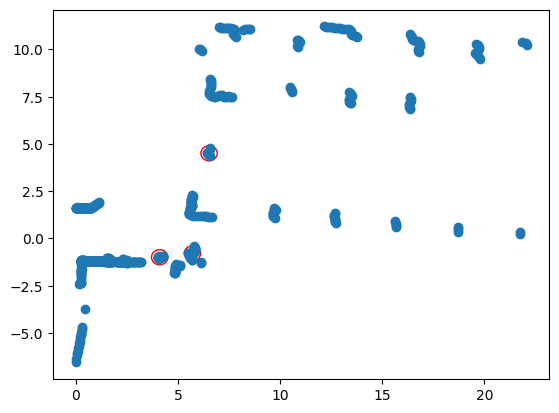

In [51]:
idx = 1000
x = scans[idx] * np.cos(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))
y = scans[idx] * np.sin(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))

idx = circle_idx[idx]
num = circle_num[idx]

cs = circles[idx:idx+num, :]
print(cs)

fig, ax = plt.subplots()
for i in range(cs.shape[0]):
    cx, cy, cr, _, _, _ = cs[i]
    ax.add_patch(plt.Circle((cx, cy), cr, fill=False, color='r'))
plt.plot(x, y, 'o')
plt.show()